In [1]:
%pylab inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk')

Populating the interactive namespace from numpy and matplotlib


## OPO locking

Expected intracavity field, transmission and reflection from resonant cavity with input injected through high-reflector (M3) or coupling mirror (M4):

In [15]:
# cavity round-trip field reduction factor
gm = lambda T1, T2: sqrt((1 - T1) * (1 - T2))

# cavity intensity build-up factor
buf = lambda T1, T2: 1 / (1 - gm(T1, T2))**2

# cavity power relative to input
P_cav = lambda T1, T2: T1 * buf(T1, T2)

# cavity transmitted power relative to input
P_trans = lambda T1, T2: T2 * P_cav(T1, T2)

# cavity reflected power relative to input
P_refl = lambda T1, T2: (1 - T1 - gm(T1, T2))**2 / (1 - T1) * buf(T1, T2)

# finesse
F = lambda T1, T2: pi * sqrt(gm(T1, T2)) / (1 - gm(T1, T2))

In [16]:
T1 = .0001
T2 = .10
print('P_cav: {:.3g}'.format(P_cav(T1, T2)))
print('P_trans: {:.3g}'.format(P_trans(T1, T2)))
print('P_refl: {:.3g}'.format(P_refl(T1, T2)))

P_cav: 0.0379
P_trans: 0.00379
P_refl: 0.996


In [17]:
T1 = .10
T2 = .0001
print('P_cav: {:.3g}'.format(P_cav(T1, T2)))
print('P_trans: {:.3g}'.format(P_trans(T1, T2)))
print('P_refl: {:.3g}'.format(P_refl(T1, T2)))

P_cav: 37.9
P_trans: 0.00379
P_refl: 0.996


In [6]:
buf(T1, T2), F(T1, T2)

(379.03560143851223, 59.571652016755316)

### PDH signal

* Reflection and transmission amplitude spectrum (R, T); 
* PDH target function ($\chi$) from [Wikipedia](https://en.wikipedia.org/wiki/Pound%E2%80%93Drever%E2%80%93Hall_technique#PDH_readout_function);
* PDH detected signals ($V_R$, $V_T$) assuming 1 unit of injected power and a detector response of 1 V / unit optical power.

Parameters:

* r1, r2: amplitude reflection coefficients of input mirror and second mirror
* L: cavity roundtrip length
* omm: angular frequency of modulation signal
* om: angular frequency detuning of light relative to cavity resonance
* phi: demodulation phase
* loss: intra-cavity intensity loss
* beta: amplitude of modulation signal relative to half-wave voltage

In [8]:
roundtripphase = lambda L, om: exp(1j * om * L / 3e11)
R = lambda r1, r2, L, om, loss=0: ((-r1 + r2 * sqrt(1-loss) * roundtripphase(L, om)) / 
                                   (1 - r1 * r2 * sqrt(1-loss) * roundtripphase(L, om)))
T = lambda r1, r2, L, om, loss=0: (sqrt(1 - r1**2) * sqrt(1 - r2**2) * sqrt(sqrt(1-loss) * roundtripphase(L, om)) / 
                                   (1 - r1 * r2 * sqrt(1-loss) * roundtripphase(L, om)))

chiR = lambda r1, r2, L, omm, om, loss=0: (R(r1, r2, L, om, loss) * conj(R(r1, r2, L, om + omm, loss)) - 
                                   conj(R(r1, r2, L, om, loss)) * R(r1, r2, L, om - omm, loss))
VR = lambda r1, r2, L, omm, beta, om, phi, loss=0: (
    .5 * beta * real(chiR(r1, r2, L, omm, om, loss)) * cos(phi) + 
    .5 * beta * imag(chiR(r1, r2, L, omm, om, loss)) * sin(phi))
chiT = lambda r1, r2, L, omm, om, loss=0: (T(r1, r2, L, om, loss) * conj(T(r1, r2, L, om + omm, loss)) - 
                                   conj(T(r1, r2, L, om, loss)) * T(r1, r2, L, om - omm, loss))
VT = lambda r1, r2, L, omm, beta, om, phi, loss=0: (
    .5 * beta * real(chiT(r1, r2, L, omm, om, loss)) * cos(phi) + 
    .5 * beta * imag(chiT(r1, r2, L, omm, om, loss)) * sin(phi))

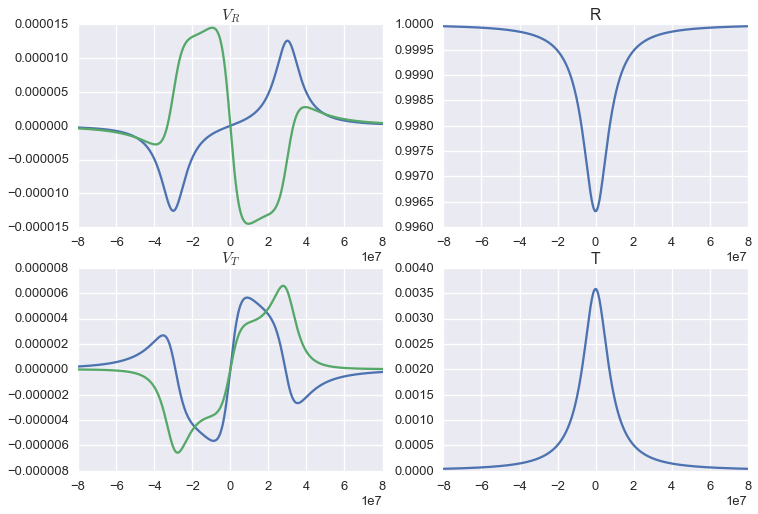

In [17]:
L = 320
fm = 30
R1 = .9999
R2 = .90
loss = .003
beta = 5/360 # our EOM's halfwave-voltage is 360 V

r1 = sqrt(R1)
r2 = sqrt(R2)
omm = 2*pi * fm * 1e6
f = linspace(-80e6, 80e6, 500)

fig, axs = subplots(2, 2, figsize=(12, 8))
sca(axs[0,0])
plot(f, VR(r1, r2, L, omm, beta, 2*pi*f, 0, loss))
plot(f, VR(r1, r2, L, omm, beta, 2*pi*f, pi/2, loss))
title('$V_R$')
sca(axs[1,0])
plot(f, VT(r1, r2, L, omm, beta, 2*pi*f, 0, loss))
plot(f, VT(r1, r2, L, omm, beta, 2*pi*f, pi/2, loss))
title('$V_T$')
sca(axs[0,1])
plot(f, abs(R(r1, r2, L, 2*pi*f, loss))**2)
title('R')
sca(axs[1,1])
plot(f, abs(T(r1, r2, L, 2*pi*f, loss))**2)
title('T') 

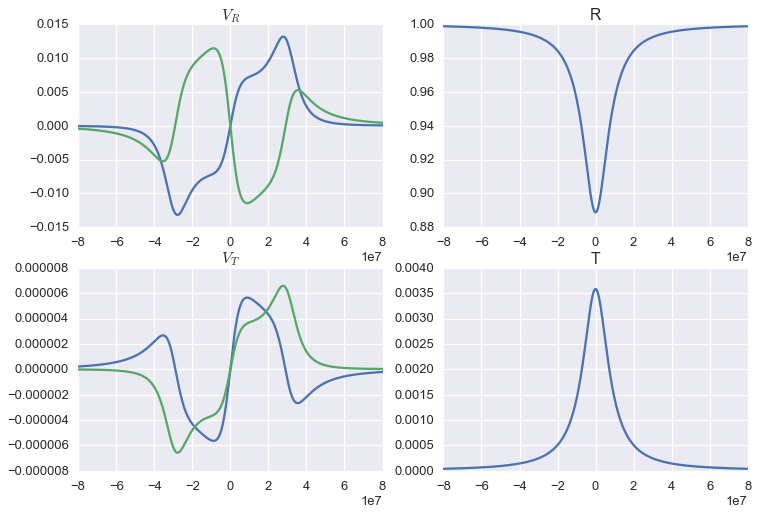

In [16]:
L = 320
fm = 30
R1 = .90
R2 = .9999
loss = .003
beta = 5/360 # our EOM's halfwave-voltage is 360 V

r1 = sqrt(R1)
r2 = sqrt(R2)
omm = 2*pi * fm * 1e6
f = linspace(-80e6, 80e6, 500)

fig, axs = subplots(2, 2, figsize=(12, 8))
sca(axs[0,0])
plot(f, VR(r1, r2, L, omm, beta, 2*pi*f, 0, loss))
plot(f, VR(r1, r2, L, omm, beta, 2*pi*f, pi/2, loss))
title('$V_R$')
sca(axs[1,0])
plot(f, VT(r1, r2, L, omm, beta, 2*pi*f, 0, loss))
plot(f, VT(r1, r2, L, omm, beta, 2*pi*f, pi/2, loss))
title('$V_T$')
sca(axs[0,1])
plot(f, abs(R(r1, r2, L, 2*pi*f, loss))**2)
title('R')
sca(axs[1,1])
plot(f, abs(T(r1, r2, L, 2*pi*f, loss))**2)
title('T') 